In [16]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt 

In [17]:
# crude oil, or any ticker
security = "NVDA"
start_date = '2014-01-01'
end_date = '2024-02-01'

df = yf.download(tickers=security, start=start_date,end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [18]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-25,623.500000,627.190002,608.500000,616.169983,616.141052,48277700
2024-01-26,609.599976,617.830017,605.729980,610.309998,610.281372,39030900
2024-01-29,612.320007,624.890015,609.070007,624.650024,624.620728,34873300
2024-01-30,629.000000,634.929993,622.599976,627.739990,627.710571,41073500
2024-01-31,614.400024,622.690002,607.000000,615.270020,615.241150,45379500


In [19]:
# calculate periodic daily return
returns = np.log(1+df['Adj Close'].pct_change())

In [20]:
returns.dropna()
returns.tail()

Date
2024-01-25    0.004147
2024-01-26   -0.009556
2024-01-29    0.023225
2024-01-30    0.004935
2024-01-31   -0.020065
Name: Adj Close, dtype: float64

In [21]:
mu, sigma = returns.mean(), returns.std()
print(mu)
print(sigma)

0.002012138195097235
0.02893240098466699


In [22]:
# simulated returns on next year of trading
sim_rets = np.random.normal(mu, sigma, 252)

In [23]:
initial = df['Adj Close'].iloc[-1]

In [24]:
sim_prices = initial * (sim_rets + 1).cumprod()

In [25]:
# acquire Rm market rate (S&P 500)
market = "^GSPC"
sp500_data = yf.download(market, start=start_date, end=end_date)
sp500_data['Daily_Return'] = sp500_data['Adj Close'].pct_change()
annual_returns = sp500_data.groupby(sp500_data.index.year)['Daily_Return'].sum()

# Print annual returns
rm = annual_returns.mean()
print(f"Annual Returns: {rm}")

[*********************100%%**********************]  1 of 1 completed

Annual Returns: 0.10281930327075141


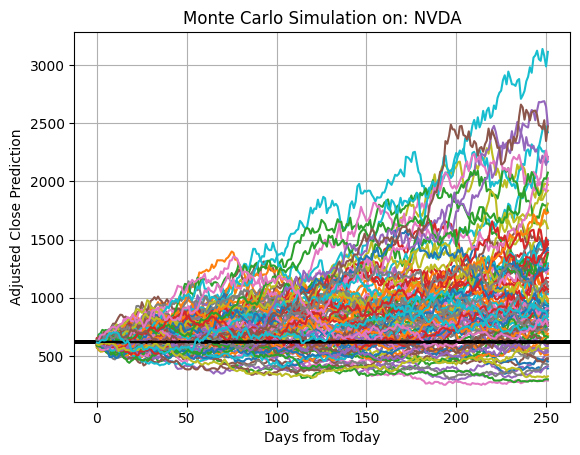

Number of Simulations that Underperformed: 18
Number of Simulations that beat the Market: 78

Max Simulated Value: 3138.027222911585
Min Simulated Value: 622.0090130084665
Average Simulated Value: 1261.5550657459303


In [29]:
count = 0
mkt_count = 0
simulations = 100

highest_simulated_value = np.zeros(simulations)

for i in range(simulations):
    # annual monte carlo simulation (252 trading days)
    sim_rets = np.random.normal(mu, sigma, 252) 
    sim_prices = initial * (sim_rets + 1).cumprod()
    plt.axhline(initial, c='k')
    plt.title("Monte Carlo Simulation on: "+security)
    plt.ylabel('Adjusted Close Prediction')
    plt.xlabel('Days from Today') 
    plt.grid(True)
    plt.plot(sim_prices)

    highest_simulated_value[i] = max(sim_prices)

    # check if end value >= to initial value
    if sim_prices[-1] >= initial:
        count += 1

    if sim_prices[-1] >= initial * (1+rm): 
        mkt_count += 1

plt.show()
print(f"Number of Simulations that Underperformed: {simulations-count}")
print(f"Number of Simulations that beat the Market: {mkt_count}\n")
print(f"Max Simulated Value: {max(highest_simulated_value)}")
print(f"Min Simulated Value: {min(highest_simulated_value)}")
print(f"Average Simulated Value: {np.mean(highest_simulated_value)}")
